# MNIST - Categorical Classification
> # Convolutional Neural Network


In [1]:
import warnings
warnings.filterwarnings('ignore')

* import Tensorflow

In [2]:
import tensorflow

tensorflow.__version__

'2.5.0'

# I. MNIST Data_Set Load

In [3]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape

In [4]:
X_train = X_train.reshape((60000,  28, 28, 1))
X_test = X_test.reshape((10000,  28, 28, 1))

* Normalization

In [5]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## 2) One Hot Encoding

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# III. MNIST Keras Modeling

> ## 1) Model Define

* Feature Extraction Layer

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


* Classification Layer

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

> ## 2) Model Compile

* 모델 학습방법 설정

In [11]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 5분

In [12]:
%%time

Hist_mnist = model.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 34s 6ms/step - loss: 0.2688 - accuracy: 0.9170 - val_loss: 0.0827 - val_accuracy: 0.9748
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0612 - accuracy: 0.9808 - val_loss: 0.0537 - val_accuracy: 0.9843
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0398 - accuracy: 0.9874 - val_loss: 0.0464 - val_accuracy: 0.9871
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0295 - accuracy: 0.9907 - val_loss: 0.0359 - val_accuracy: 0.9899
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0359 - val_accuracy: 0.9892
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0176 - accuracy: 0.9945 - val_loss: 0.0335 - val_accuracy: 0.9912
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.0434 - val_accuracy: 0.988

> ## 4) 학습 결과 시각화

* Loss Visualization

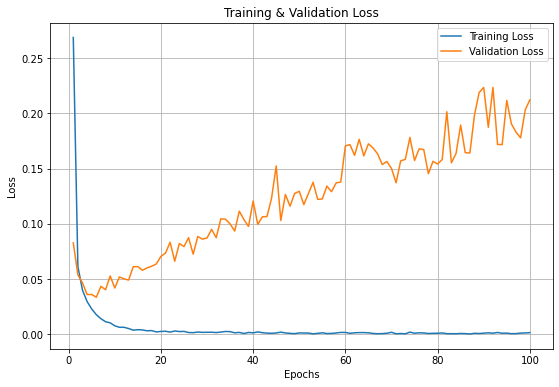

In [13]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.4)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.1338 - accuracy: 0.9929
Loss = 0.13379
Accuracy = 0.99290


# 
# 
# 
# The End
# 
# 
# 